In [1]:
from nixtla import NixtlaClient

In [2]:
nixtla_client = NixtlaClient(api_key="nixak-sVs734PNn3JEOMYhbwrfTAW5C9Y1Jqu3jDBlBW38DgOxX8tLmcZSmX4InxwXiiEFXllPOCcGmdKEYSZW")

In [3]:
#Verifying API key, was able to access this after creating account and following manual at
#https://nixtlaverse.nixtla.io/nixtla/docs/getting-started/quickstart.html#step-1-create-a-timegpt-account-and-generate-your-api-key
nixtla_client.validate_api_key()

INFO:nixtla.nixtla_client:Happy Forecasting! :)


True

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

cf.go_offline()

%matplotlib inline

In [5]:
df = pd.read_csv("flu-hospital-admissions.csv", parse_dates = ["date"])
df = df[df["location_name"] == "US"]
df

,date,location,location_name,value,weekly_rate
45,2024-02-17,US,US,11127.0,3.322337
98,2024-02-24,US,US,10873.0,3.246496
151,2024-03-02,US,US,10815.0,3.229179
204,2024-03-09,US,US,9417.0,2.811759
257,2024-03-16,US,US,7327.0,2.187720
...,...,...,...,...,...
7828,2023-03-04,US,US,1504.0,0.449069
7881,2023-03-11,US,US,1372.0,0.409656
7934,2023-03-18,US,US,1415.0,0.422495
7987,2023-03-25,US,US,1331.0,0.397414


In [17]:
df["date"]

45     2024-02-17
98     2024-02-24
151    2024-03-02
204    2024-03-09
257    2024-03-16
          ...    
7828   2023-03-04
7881   2023-03-11
7934   2023-03-18
7987   2023-03-25
8040   2023-04-01
Name: date, Length: 152, dtype: datetime64[ns]

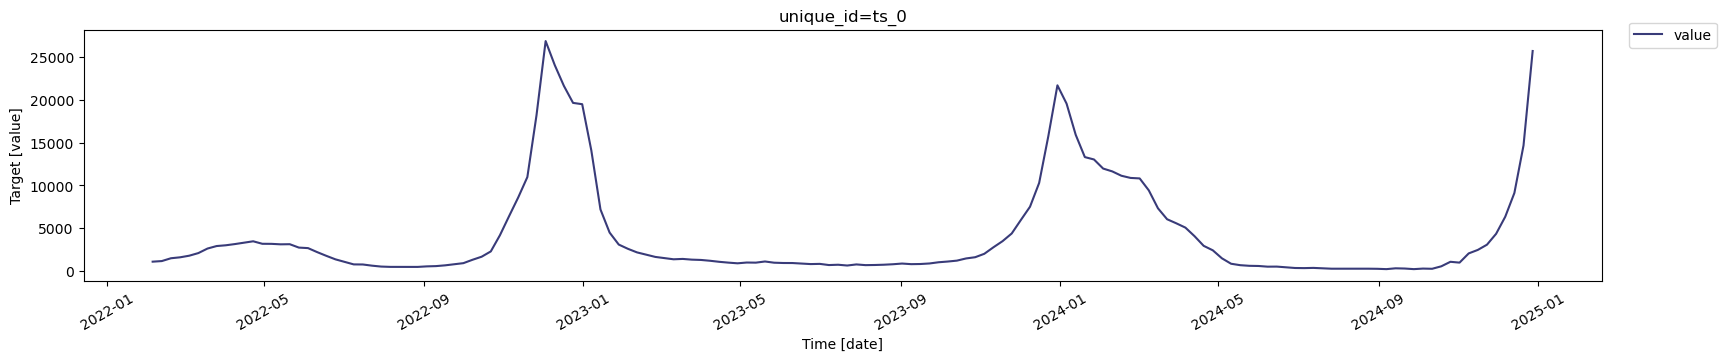

In [6]:
#Traditional plot, works easily with pandas data frame
#Problem can potentially arise when time/date column is the index, which is the standard practice for a normal matplotlib/plotly/pandas plotting flow
nixtla_client.plot(df, time_col="date", target_col="value")

In [7]:
#No need to sort or set index, but heavy limitations on setting axis title, date ranges, etc.

In [8]:
#A lot of reformatting of dataset to fit plotly or matplotlib plotting specifications
plotly_df = df[['date','value']]
plotly_df['date'] = pd.to_datetime(plotly_df['date'])
plotly_df.set_index('date', inplace=True)
plotly_df.sort_values(by="date", inplace=True)
plotly_df

,value
date,
2022-02-05,1095.0
2022-02-12,1164.0
2022-02-19,1493.0
2022-02-26,1603.0
2022-03-05,1791.0
...,...
2024-11-30,4348.0
2024-12-07,6342.0
2024-12-14,9118.0


In [9]:
#Reference point to compare visual plots
plotly_df["value"].iplot(yTitle = "Count", xTitle = "Date", title = "US Flu Hospital Admissions")

/Users/anshulchiranth/anaconda3/lib/python3.11/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



In [10]:
#Forecasting which returns data frame. frequency (freq) is a parameter, I've left it blank as the library is supposed to automatically detect frequency
#model is also a parameter, I've left it at default
timegpt_fcst_df = nixtla_client.forecast(df=df, time_col='date', target_col='value', h=12)
timegpt_fcst_df

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: W-SAT
/Users/anshulchiranth/anaconda3/lib/python3.11/site-packages/nixtla/nixtla_client.py:382: UserWarning:

`df` contains the following exogenous features: ['location', 'location_name', 'weekly_rate'], but `X_df` was not provided and they were not declared in `hist_exog_list`. They will be ignored.

INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,date,TimeGPT
0,2025-01-04,25526.8340
1,2025-01-11,19926.2580
2,2025-01-18,16872.2850
3,2025-01-25,14927.5700
4,2025-02-01,13745.6890
5,2025-02-08,12477.0420
6,2025-02-15,11619.2960
7,2025-02-22,10918.6290
8,2025-03-01,10426.8950
9,2025-03-08,9191.7705


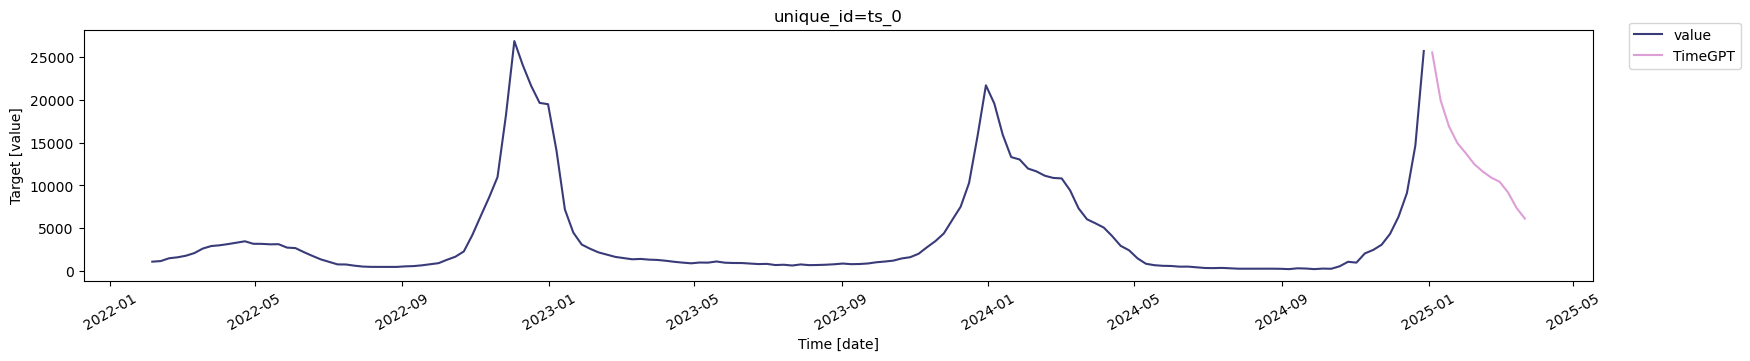

In [11]:
#Easy to plot the training df and the forecasted df
nixtla_client.plot(df, timegpt_fcst_df, time_col='date', target_col='value')

In [12]:
#Little case study. Wanted to see what the prediction would look like in a big spike in December

In [13]:
#Setting up training data frame to be only US data and exclude last 4 weeks (December)
training_df = df.copy()
training_df = training_df.sort_values(by="date")
training_df = training_df.iloc[:-4]
training_df

,date,location,location_name,value,weekly_rate
2483,2022-02-05,US,US,1095.0,0.326949
2536,2022-02-12,US,US,1164.0,0.347551
2589,2022-02-19,US,US,1493.0,0.445785
2642,2022-02-26,US,US,1603.0,0.478629
2695,2022-03-05,US,US,1791.0,0.534763
...,...,...,...,...,...
2006,2024-11-02,US,US,983.0,0.293507
2059,2024-11-09,US,US,2059.0,0.614783
2112,2024-11-16,US,US,2468.0,0.736904
2165,2024-11-23,US,US,3078.0,0.919039


In [14]:
#Forecast next 4 weeks based on this dataframe
forecast_df = nixtla_client.forecast(df=training_df, time_col='date', target_col='value', h=4)
forecast_df = forecast_df.set_index("date")
forecast_df

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: W-SAT
/Users/anshulchiranth/anaconda3/lib/python3.11/site-packages/nixtla/nixtla_client.py:382: UserWarning:

`df` contains the following exogenous features: ['location', 'location_name', 'weekly_rate'], but `X_df` was not provided and they were not declared in `hist_exog_list`. They will be ignored.

INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,TimeGPT
date,
2024-12-07,6172.6436
2024-12-14,8456.0600
2024-12-21,11276.1900
2024-12-28,14208.0980


In [15]:
#Creating data frame that has one column as training data, one column as real data, and one column as TimeGPT prediction
plotting_df = pd.DataFrame()
plotting_df.index = plotly_df.index
plotting_df["Training Data"] = plotly_df["value"].iloc[:-4]
plotting_df["Real Data"] = plotly_df["value"].iloc[-4:]
plotting_df["TimeGPT Prediction"] = forecast_df["TimeGPT"]
plotting_df

,Training Data,Real Data,TimeGPT Prediction
date,,,
2022-02-05,1095.0,NaN,NaN
2022-02-12,1164.0,NaN,NaN
2022-02-19,1493.0,NaN,NaN
2022-02-26,1603.0,NaN,NaN
2022-03-05,1791.0,NaN,NaN
...,...,...,...
2024-11-30,4348.0,NaN,NaN
2024-12-07,NaN,6342.0,6172.6436
2024-12-14,NaN,9118.0,8456.0600


In [16]:
plotting_df.iplot(xTitle = "Date", yTitle = "Count", title = "TimeGPT vs Real Data")

/Users/anshulchiranth/anaconda3/lib/python3.11/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



In [18]:
timegpt_fcst_df

,date,TimeGPT
0,2025-01-04,25526.8340
1,2025-01-11,19926.2580
2,2025-01-18,16872.2850
3,2025-01-25,14927.5700
4,2025-02-01,13745.6890
5,2025-02-08,12477.0420
6,2025-02-15,11619.2960
7,2025-02-22,10918.6290
8,2025-03-01,10426.8950
9,2025-03-08,9191.7705
